In [83]:
import numpy as np

def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def get_usps(l,datax,datay):
    if type(l)!=list:
        resx = datax[datay==l,:]
        resy = datay[datay==l]
        return resx,resy
    tmp =   list(zip(*[get_usps(i,datax,datay) for i in l]))
    tmpx,tmpy = np.vstack(tmp[0]),np.hstack(tmp[1])
    return tmpx,tmpy

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")
    plt.show()

In [84]:
path_to_train = '../data/USPS_train.txt'
path_to_test = '../data/USPS_test.txt'

X_train, y_train = load_usps(path_to_train)
X_test, y_test = load_usps(path_to_test)

In [85]:
print(X_train.shape)
print(y_train.shape)

(7291, 256)
(7291,)


In [86]:
from SequentielNet import Sequentiel, Optim, SGD
from LinearModel import Linear
from MultiClass import CELossSoftMax
from NonLinearModel import Tanh, Sigmoid, SoftMax
import matplotlib.pyplot as plt
import numpy as np

In [87]:
batch = 64
input = 256
output1 = 128
output2 = 64
output3 = 10

epochs = 100

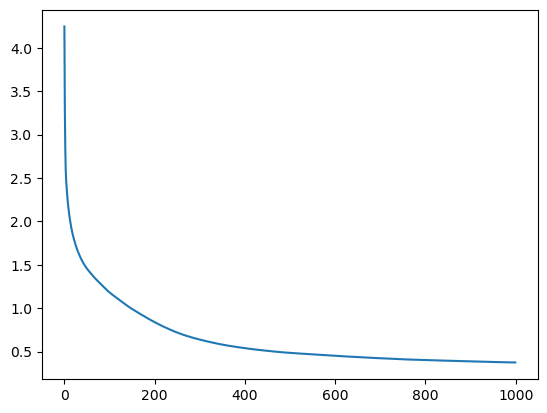

In [88]:
net = Sequentiel(Linear(input, output1), Sigmoid(), Linear(output1, output2), Sigmoid(), Linear(output2, output3))
optim = Optim(net, CELossSoftMax(), 1e-3)
scores = []

for iteration in range(epochs):
    optim.zero_score()
    optim.step(X_train, y_train)
    optim.update_output()
    scores.append(optim.score.sum())


plt.plot(np.arange(epochs), scores)
plt.show()


In [89]:
optim.y_hat

array([[ 2.87914081,  0.09569521,  1.7404527 , ..., -1.2564206 ,
        -1.65738839, -2.77280679],
       [ 2.92671174, -0.71097378,  1.36088925, ...,  0.65343716,
         0.71292702, -0.41374311],
       [ 2.05957605, -2.22399649,  2.89169213, ...,  1.92658624,
         2.97588055,  0.28698616],
       ...,
       [ 1.436677  , -1.09918288,  3.05800553, ...,  1.35522433,
         3.61481031, -0.84309467],
       [ 6.85878832, -2.76252794,  0.74477125, ...,  0.59323618,
        -0.55544399,  0.35462607],
       [-3.11795063,  4.71800152,  3.26890454, ...,  1.42181396,
         5.13744936,  3.74209609]])

In [90]:
softmax = SoftMax()

In [91]:
print(softmax.forward(optim.y_hat))

array([[7.15021793e-07, 4.42063047e-08, 2.28977767e-07, ...,
        1.14358323e-08, 7.65825249e-09, 2.51020750e-09],
       [7.49858071e-07, 1.97311466e-08, 1.56657433e-07, ...,
        7.72162072e-08, 8.19491742e-08, 2.65606049e-08],
       [3.15055325e-07, 4.34565163e-09, 7.24052818e-07, ...,
        2.75822750e-07, 7.87649163e-07, 5.35255107e-08],
       ...,
       [1.68991635e-07, 1.33830547e-08, 8.55065220e-07, ...,
        1.55772490e-07, 1.49216375e-06, 1.72891224e-08],
       [3.82523598e-05, 2.53614260e-09, 8.46007779e-08, ...,
        7.27048714e-08, 2.30514395e-08, 5.72712230e-08],
       [1.77752434e-09, 4.49703575e-06, 1.05582397e-06, ...,
        1.66498478e-07, 6.84053740e-06, 1.69471235e-06]])

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
pred = np.argmax(softmax.forward(optim.y_hat), axis=1)
print(f'accuracy : {accuracy_score(y_train, pred)}')

accuracy : 0.8969962968042793


In [94]:
pred[1]

5

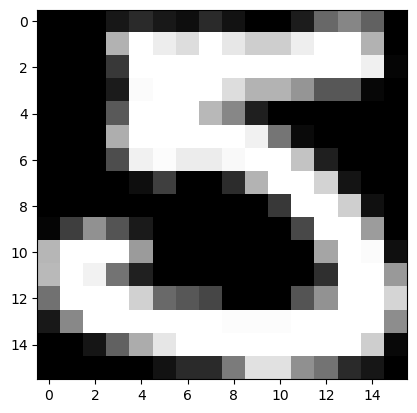

In [95]:
show_usps(X_train[1])

In [96]:
optim.step(X_test, y_test)
optim.update_output()

pred_test = np.argmax(softmax.forward(optim.y_hat), axis=1)
print(f'accuracy : {accuracy_score(y_test, pred_test)}')

accuracy : 0.8490284005979073
